In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.dates import YearLocator, DateFormatter
import nltk
from collections import Counter
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize.toktok import ToktokTokenizer
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException
import re
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from igraph import Graph, plot
import warnings
warnings.filterwarnings("ignore")

In [2]:

def plot_category_stats(data, col):
    '''
    Plots bar charts for the mean, median, and sum of ratings grouped by a specified category.

    Parameters:
    data (pd.DataFrame): DataFrame containing the data with columns for categories and ratings.
    col (str): Column name to group by (e.g., 'primary_category').

    Returns:
    None
    '''
    # Calculate mean, median, and sum of ratings for each category
    category_stats = data.groupby(col)['rating'].agg(['mean', 'median', 'sum']).reset_index()

    # Plot the statistics
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)

    # Mean Ratings
    sns.barplot(x=col, y='mean', data=category_stats, palette='viridis', ax=axes[0])
    axes[0].set_xlabel('Primary Category')
    axes[0].set_ylabel('Mean Rating')
    axes[0].set_title(f'Mean Rating by {col}')
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].set_ylim(0, category_stats['mean'].max() * 1.1)  # Set y-axis limit

    # Median Ratings
    sns.barplot(x=col, y='median', data=category_stats, palette='viridis', ax=axes[1])
    axes[1].set_xlabel('Primary Category')
    axes[1].set_ylabel('Median Rating')
    axes[1].set_title(f'Median Rating by {col}')
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].set_ylim(0, category_stats['median'].max() * 1.1)  # Set y-axis limit

    # Sum Ratings
    sns.barplot(x=col, y='sum', data=category_stats, palette='viridis', ax=axes[2])
    axes[2].set_xlabel('Primary Category')
    axes[2].set_ylabel('Total Rating')
    axes[2].set_title(f'Total Rating by {col}')
    axes[2].tick_params(axis='x', rotation=45)
    axes[2].set_ylim(0, category_stats['sum'].max() * 1.1)  # Set y-axis limit

    plt.tight_layout()
    plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

def plot_sentiment_distribution(df, column_name):
    """
    Plots the distribution of sentiment scores from the specified column of a DataFrame.

    Parameters:
    df (pandas.DataFrame): The DataFrame containing the sentiment data.
    column_name (str): The name of the column containing the sentiment scores.
    """
    # Set the color palette
    sns.set_palette('viridis')

    # Plot the histogram
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column_name], bins=30, kde=False, color=sns.color_palette('viridis', as_cmap=True)(0.5), edgecolor='black', shrink=0.8)

    # Add titles and labels
    plt.title(f'Distribution of {column_name}', fontsize=16)
    plt.xlabel(f'{column_name}', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)

    # Add grid for better readability
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Show plot
    plt.show()


col = ['Unnamed: 0', 'author_id', 'rating', 'is_recommended', 'helpfulness',
       'total_feedback_count', 'total_neg_feedback_count',
       'total_pos_feedback_count', 'submission_time', 'review_text',
       'review_title', 'skin_tone', 'eye_color', 'skin_type', 'hair_color',
       'product_id', 'product_name', 'brand_name', 'price_usd',
       'primary_category', 'cleaned_review_text']

In [3]:
product_df = pd.read_csv("/media/yatipa_drive/Sephora_deep_learning/data/product_info.csv")


t1 = pd.read_csv('/media/yatipa_drive/Sephora_deep_learning/data/cleaned_review_0-250_text.csv',usecols=['rating',
       'total_feedback_count', 'total_neg_feedback_count',
       'total_pos_feedback_count', 'submission_time','product_name', 'brand_name', 'review_title', 'is_recommended',
       'primary_category', 'cleaned_review_text'])#pd.read_csv("reviews_0-250.csv")
# t2 = pd.read_csv("reviews_250-500.csv")
# t3 = pd.read_csv("reviews_1250-end.csv")
# t4 = pd.read_csv("reviews_500-750.csv") 
# review_df = pd.concat([t1,t2,t3]).drop(columns='Unnamed: 0') .sort_values(by = 'submission_time')
review_df = t1
# review_df['primary_category'] = review_df.product_id.map(dict(zip(product_df.product_id, product_df.primary_category)))
# review_df['submission_time'] = pd.to_datetime(review_df['submission_time'])
review_df['submission_time'] = pd.to_datetime(review_df['submission_time'], errors='coerce', format='%Y-%m-%d')
review_df.sort_values(by = 'submission_time',inplace=True)
review_df.dropna(inplace=True)

Index(['product_id', 'product_name', 'brand_id', 'brand_name', 'loves_count',
       'rating', 'reviews', 'size', 'variation_type', 'variation_value',
       'variation_desc', 'ingredients', 'price_usd', 'value_price_usd',
       'sale_price_usd', 'limited_edition', 'new', 'online_only',
       'out_of_stock', 'sephora_exclusive', 'highlights', 'primary_category',
       'secondary_category', 'tertiary_category', 'child_count',
       'child_max_price', 'child_min_price'],
      dtype='object')


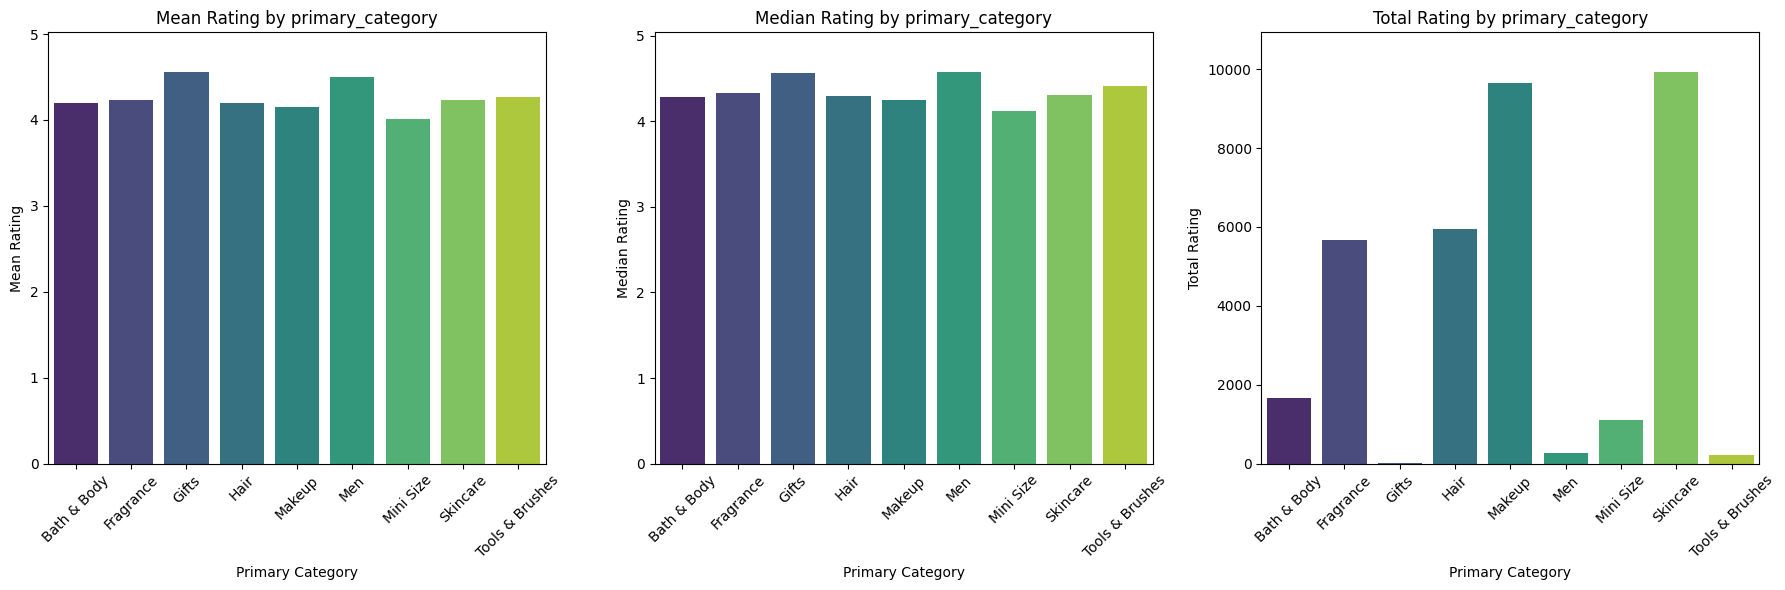

In [4]:
print(product_df.columns )
plot_category_stats(product_df, 'primary_category')

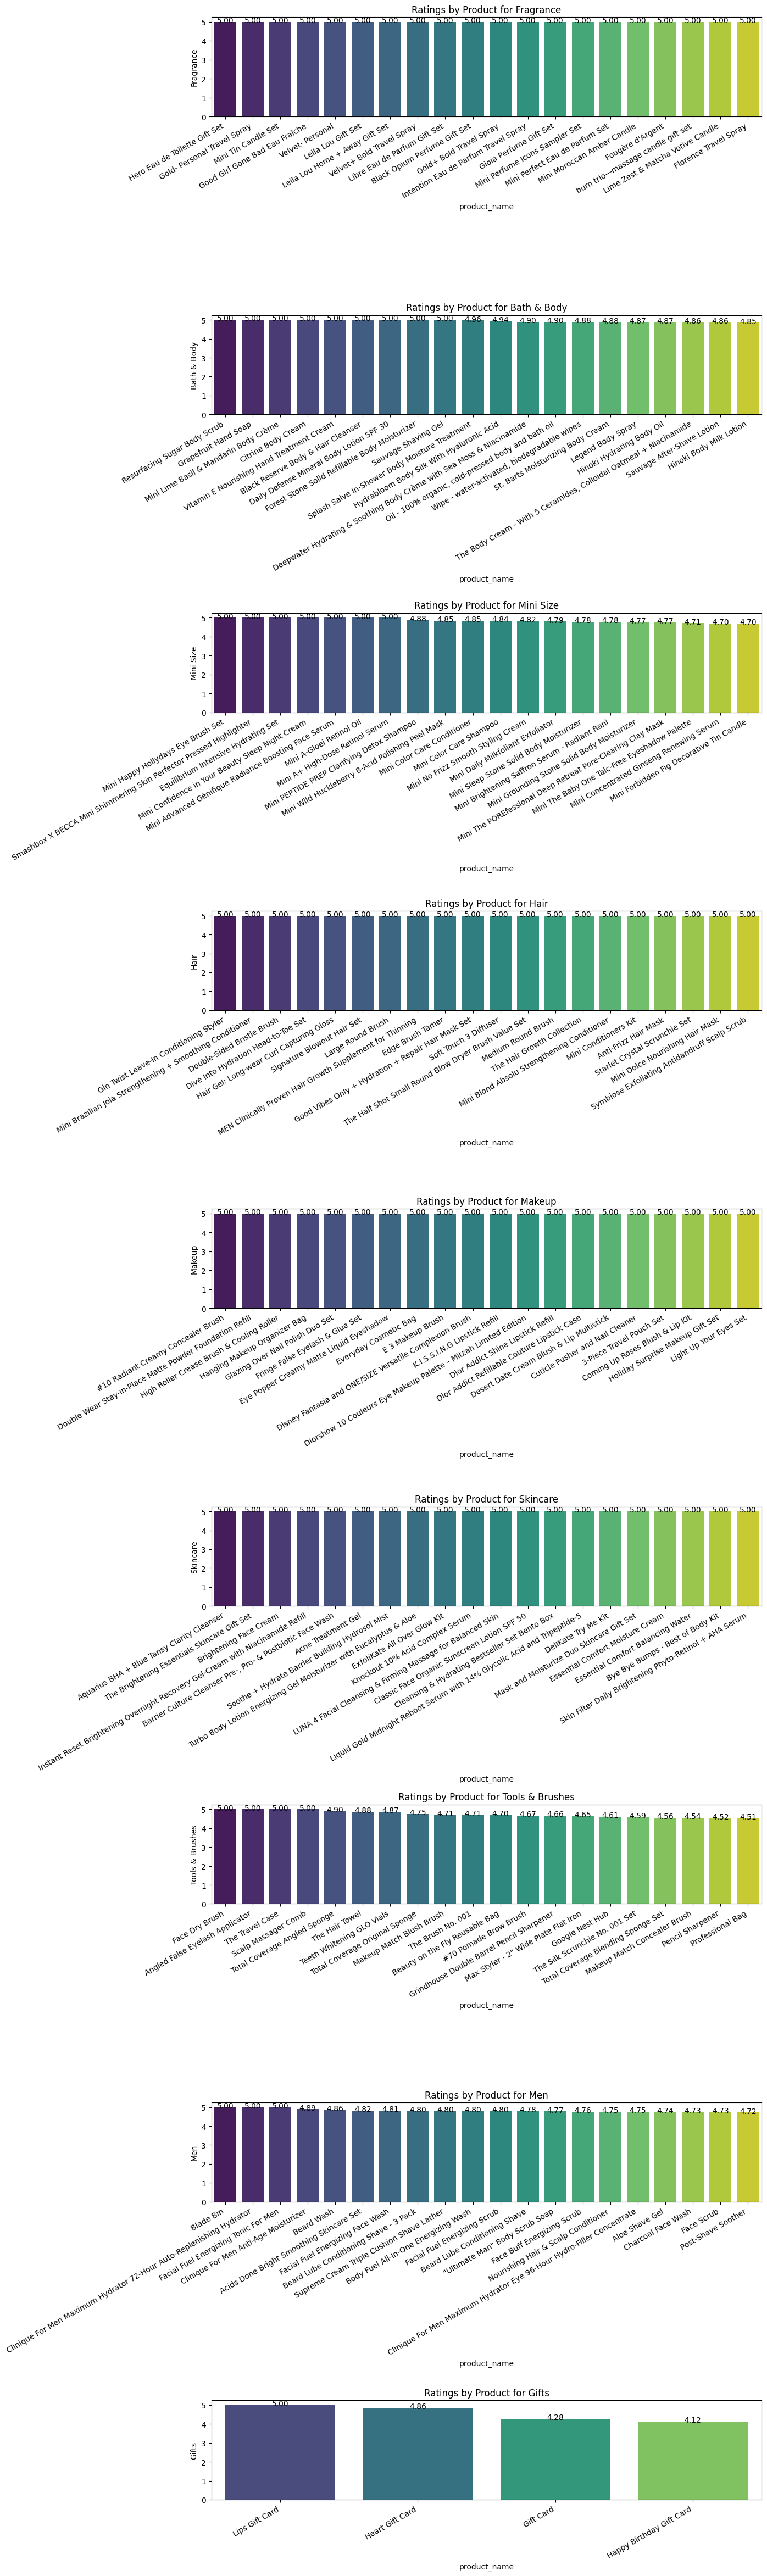

In [5]:
# Get unique primary categories
categories = product_df.primary_category.unique()

# Set up the plotting environment
fig, axes = plt.subplots(len(categories), 1, figsize=(14, 2 + 5 * len(categories)))

# Ensure axes is always iterable
if len(categories) == 1:
    axes = [axes]

# Loop over each category and plot
for ax, category in zip(axes, categories):
    product_df_i = product_df[product_df.primary_category == category]
    product_df_i = product_df_i.groupby('product_name')[['rating']].mean().reset_index().sort_values(by = 'rating',ascending = False).iloc[:20]
    bar_plot = sns.barplot(x='product_name', y='rating', data=product_df_i, palette='viridis', ax=ax)
    ax.set_title(f'Ratings by Product for {category}')
    ax.set_ylabel(category)  # Set y-label to the current category
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')  # Rotate x-axis labels for better readability

    # Annotate each bar with its height
    for p in bar_plot.patches:
        height = p.get_height()
        ax.annotate(f'{height:.2f}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='center', 
                    xytext=(0, 2),  # 3 points vertical offset
                    textcoords='offset points')

# Adjust layout to make room for labels
plt.tight_layout()
plt.subplots_adjust(hspace=2) 
plt.show()

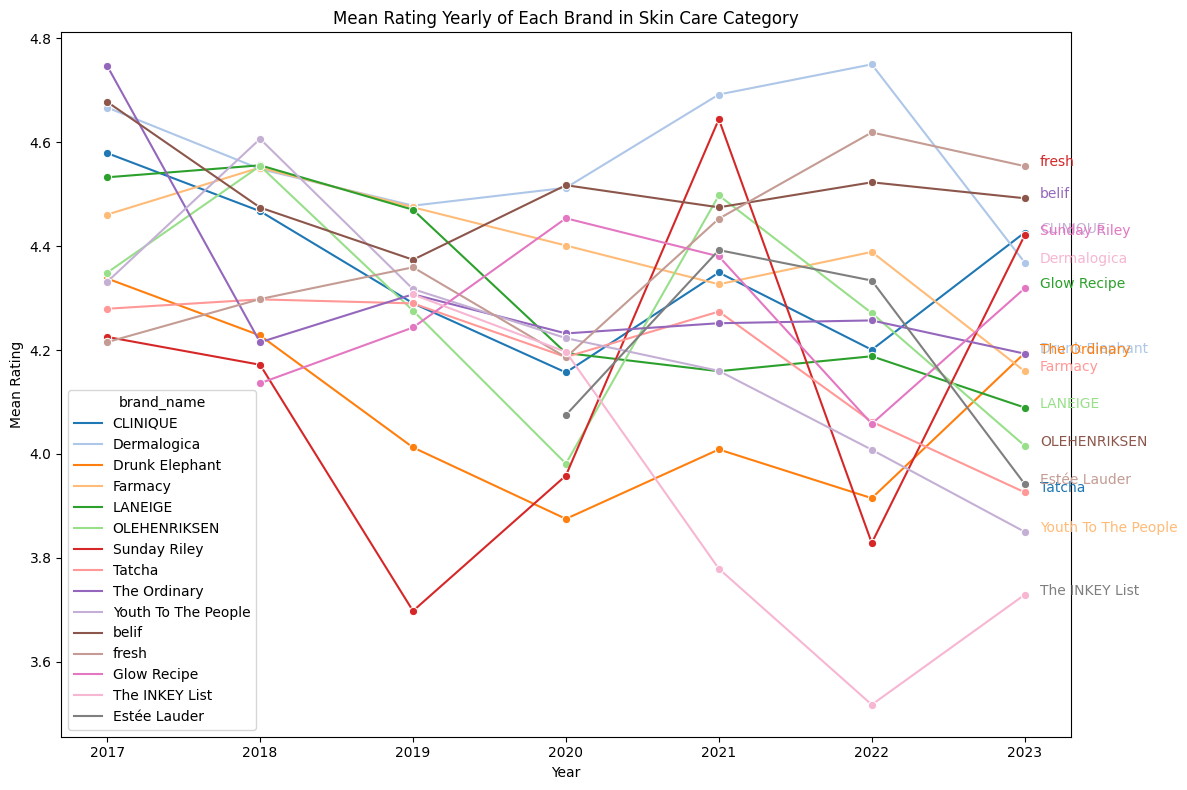

In [6]:
# Get the top 15 brands by review count
top_brand = list(review_df.brand_name.value_counts().iloc[:15].index)
top_brand_review_df = review_df[review_df.brand_name.isin(top_brand)]

# Convert submission_time to datetime
top_brand_review_df['submission_time'] = pd.to_datetime(top_brand_review_df['submission_time'])

# Extract the year from submission_time
top_brand_review_df['year'] = top_brand_review_df['submission_time'].dt.year

# Group by year and brand_name and calculate the mean rating
mean_rating_yearly = top_brand_review_df.groupby(['year', 'brand_name'])['rating'].mean().reset_index()

# Create the line plot
plt.figure(figsize=(12, 8))
palette = sns.color_palette("tab20", len(top_brand))  # Use a color palette with 20 distinct colors
sns.lineplot(data=mean_rating_yearly, x='year', y='rating', hue='brand_name', palette=palette, marker='o')

# Set plot title and labels
plt.title('Mean Rating Yearly of Each Brand in Skin Care Category')
plt.xlabel('Year')
plt.ylabel('Mean Rating')
# plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')

# Label each line with the brand name at the end
for brand in top_brand:
    brand_data = mean_rating_yearly[mean_rating_yearly['brand_name'] == brand]
    plt.text(brand_data['year'].max() + 0.1, 
             brand_data['rating'].iloc[-1], 
             brand, 
             horizontalalignment='left', 
             size='medium', 
             color=palette[top_brand.index(brand)])

# Show plot
plt.tight_layout()
plt.show()

In [7]:
# ######### DONT DELETE:
# # Plot the data
# plt.figure(figsize=(10, 6))
# plt.plot(review_df.submission_time, review_df.total_feedback_count.cumsum(), linestyle='-', color='b', label='Total Feedback')
# plt.plot(review_df.submission_time, review_df.total_neg_feedback_count.cumsum(),linestyle='-', color='r', label='Total Negative Feedback')
# plt.plot(review_df.submission_time, review_df.total_pos_feedback_count.cumsum(), linestyle='-', color='g', label='Total Positive Feedback')

# # Add title and labels
# plt.title('Cumulative Feedback Over Time')
# plt.xlabel('Submission Time')
# plt.ylabel('Cumulative Feedback Count')

# # Set major locator and formatter for yearly labels
# plt.gca().xaxis.set_major_locator(YearLocator())
# plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))

# # Rotate x-axis ticks
# plt.xticks(rotation=45)

# # Add grid
# plt.grid(True)

# # Add legend
# plt.legend()

# # Show the plot
# plt.tight_layout()
# plt.show()

In [8]:
# ######### DONT DELETE:
# # review_df has column total_neg_feedback_count	total_pos_feedback_count and brand_name 
# # Set up the figure
# plt.figure(figsize=(12, 8))
# gb_top_brand_review_df = top_brand_review_df.groupby(['brand_name'])[['total_pos_feedback_count','total_neg_feedback_count']].sum().reset_index()
# # Plot negative feedback counts
# sns.barplot(data=gb_top_brand_review_df, y='brand_name', x='total_neg_feedback_count', color='red', label='Negative Feedback', alpha =  0.5)

# # Plot positive feedback counts
# sns.barplot(data=gb_top_brand_review_df, y='brand_name', x='total_pos_feedback_count', color='blue', label='Positive Feedback', alpha =  0.5)

# plt.title('Feedback Counts by Brand')
# plt.xlabel('Count')
# plt.ylabel('Brand')
# plt.legend(title='Feedback Type')
# plt.show()

--------------

In [9]:
########## DONT DELETE: get clean txt
# df = review_df
# def simple_stemmer(text):
#     ps=nltk.porter.PorterStemmer()
#     text= ' '.join([ps.stem(word) for word in text.split()])
#     return text
# #removing the stopwords
# #Setting English stopwords
# stopword_list=nltk.corpus.stopwords.words('english')
# stop=set(stopwords.words('english'))
# #Tokenization of text
# tokenizer=ToktokTokenizer()
# def remove_stopwords(text, is_lower_case=False):
#     tokens = tokenizer.tokenize(text)
#     tokens = [token.strip() for token in tokens]
#     if is_lower_case:
#         filtered_tokens = [token for token in tokens if token not in stopword_list]
#     else:
#         filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
#     filtered_text = ' '.join(filtered_tokens)    
#     return filtered_text

# # Preprocess the data
# df['review_text'].fillna('', inplace=True)

# # Function to clean text
# def clean_text(text):
#     text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove non-English characters
#     text = text.lower()  # Convert to lowercase
#     text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
#     return text

# # Apply text cleaning
# df['cleaned_review_text'] = df['review_text'].apply(clean_text)
# df['cleaned_review_text']=df['cleaned_review_text'].apply(remove_stopwords) ########## remove stop words in English are “the”, “a”, “an”, “so”, “what”.
# # Function to detect language and filter out non-English reviews
# def is_english(text):
#     try:
#         return detect(text) == 'en'
#     except LangDetectException:
#         return False

# # Filter out non-English reviews
# df = df[df['cleaned_review_text'].apply(is_english)]

# df.to_csv('cleaned_review_0-250_text.csv',index=False)


In [10]:
df = review_df
# Compute word count for each review
df['word_count'] = df['cleaned_review_text'].apply(lambda x: len(x.split()))

# # Group by rating and compute the average word count
word_count_by_rating = df.groupby('rating')['word_count'].mean().reset_index()
print(f'the number of word is not correlated with rating')
display(word_count_by_rating)


the number of word is not correlated with rating


,rating,word_count
0,1.0,29.784999
1,2.0,32.594448
2,3.0,34.409640
3,4.0,34.781573
4,5.0,32.260195


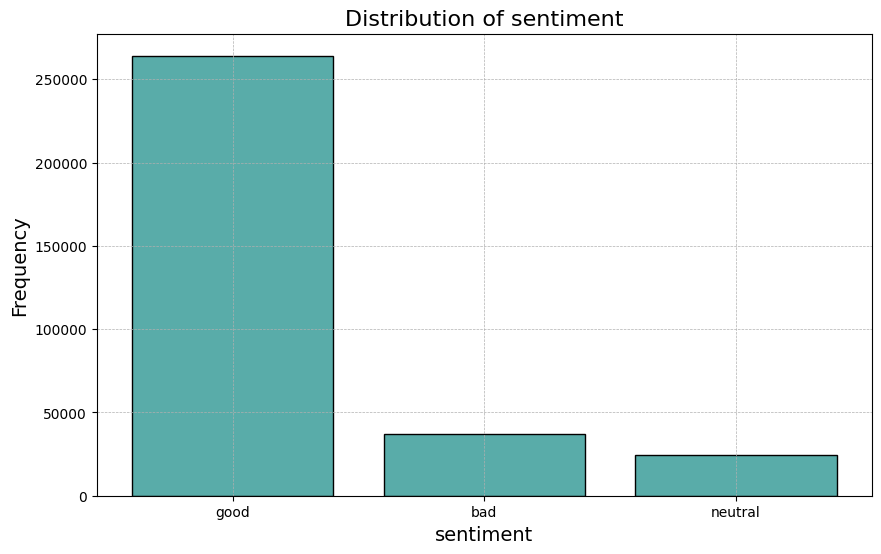

In [11]:
# Load your dataset
# reduced_dataset = pd.read_csv('reduced_dataset.csv', index_col=0)
def classify_sentiment(rating):
    if rating >= 4:
        return 'good'
    elif rating <= 2:
        return 'bad'
    else:
        return 'neutral'

df['sentiment'] = df['rating'].apply(classify_sentiment)
plot_sentiment_distribution(df, 'sentiment')

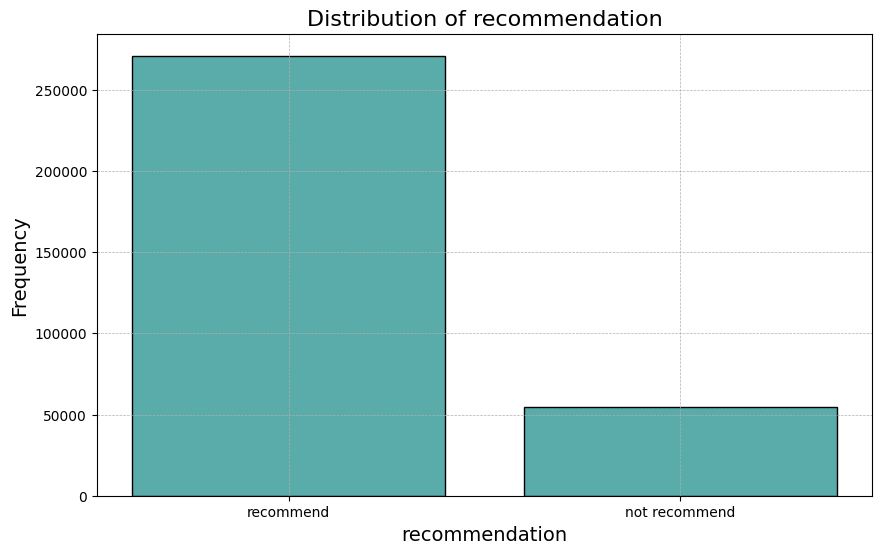

In [12]:
def map_recommendation(value):
    return 'recommend' if value == 1 else 'not recommend'
df['is_recommended'] = df['is_recommended'].apply(map_recommendation)
df.rename(columns={'is_recommended': 'recommendation'}, inplace=True)

plot_sentiment_distribution(df, 'recommendation')

In [13]:
# df has column cleaned_review_text. I want to illustrate the top 20 frequent words.

# code Python

[nltk_data] Downloading package punkt to /home/yatipa/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/yatipa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


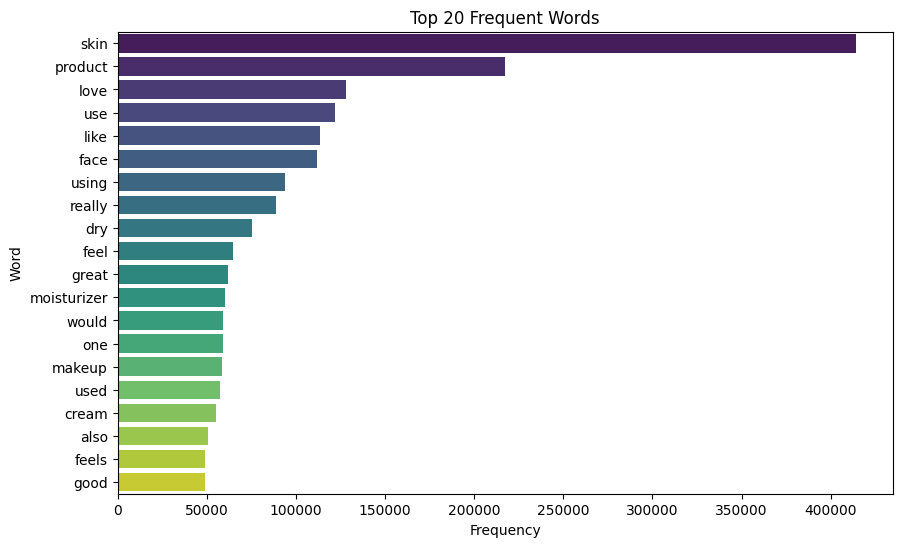

In [14]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Download the NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Sample DataFrame
# df = pd.DataFrame({'cleaned_review_text': ['sample review text']})  # Replace with your DataFrame

# Combine all review texts into a single string
all_text = ' '.join(df['cleaned_review_text'])

# Tokenize the text
words = word_tokenize(all_text)

# Remove stopwords
stop_words = set(stopwords.words('english'))
# Add custom stopwords
custom_stop_words = {'ive', 'im', 'youre', 'thats', 'dont', 'cant', 'didnt', 'doesnt', 'isnt', 'wasnt', 'wont', 'wouldnt', 'couldnt', 'shes', 'hes', 'theyre', 'whats', 'theres', 'werent', 'arent', 'its'}
stop_words.update(custom_stop_words)

# Filter out stopwords and non-alphabetic words
filtered_words = [word for word in words if word.lower() not in stop_words and word.isalpha()]

# Count the frequency of each word
word_counts = Counter(filtered_words)

# Get the top 20 most common words
top_20_words = word_counts.most_common(20)

# Convert to DataFrame for plotting
top_20_df = pd.DataFrame(top_20_words, columns=['Word', 'Frequency'])

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=top_20_df, palette='viridis')
plt.title('Top 20 Frequent Words')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()


[nltk_data] Downloading package punkt to /home/yatipa/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/yatipa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


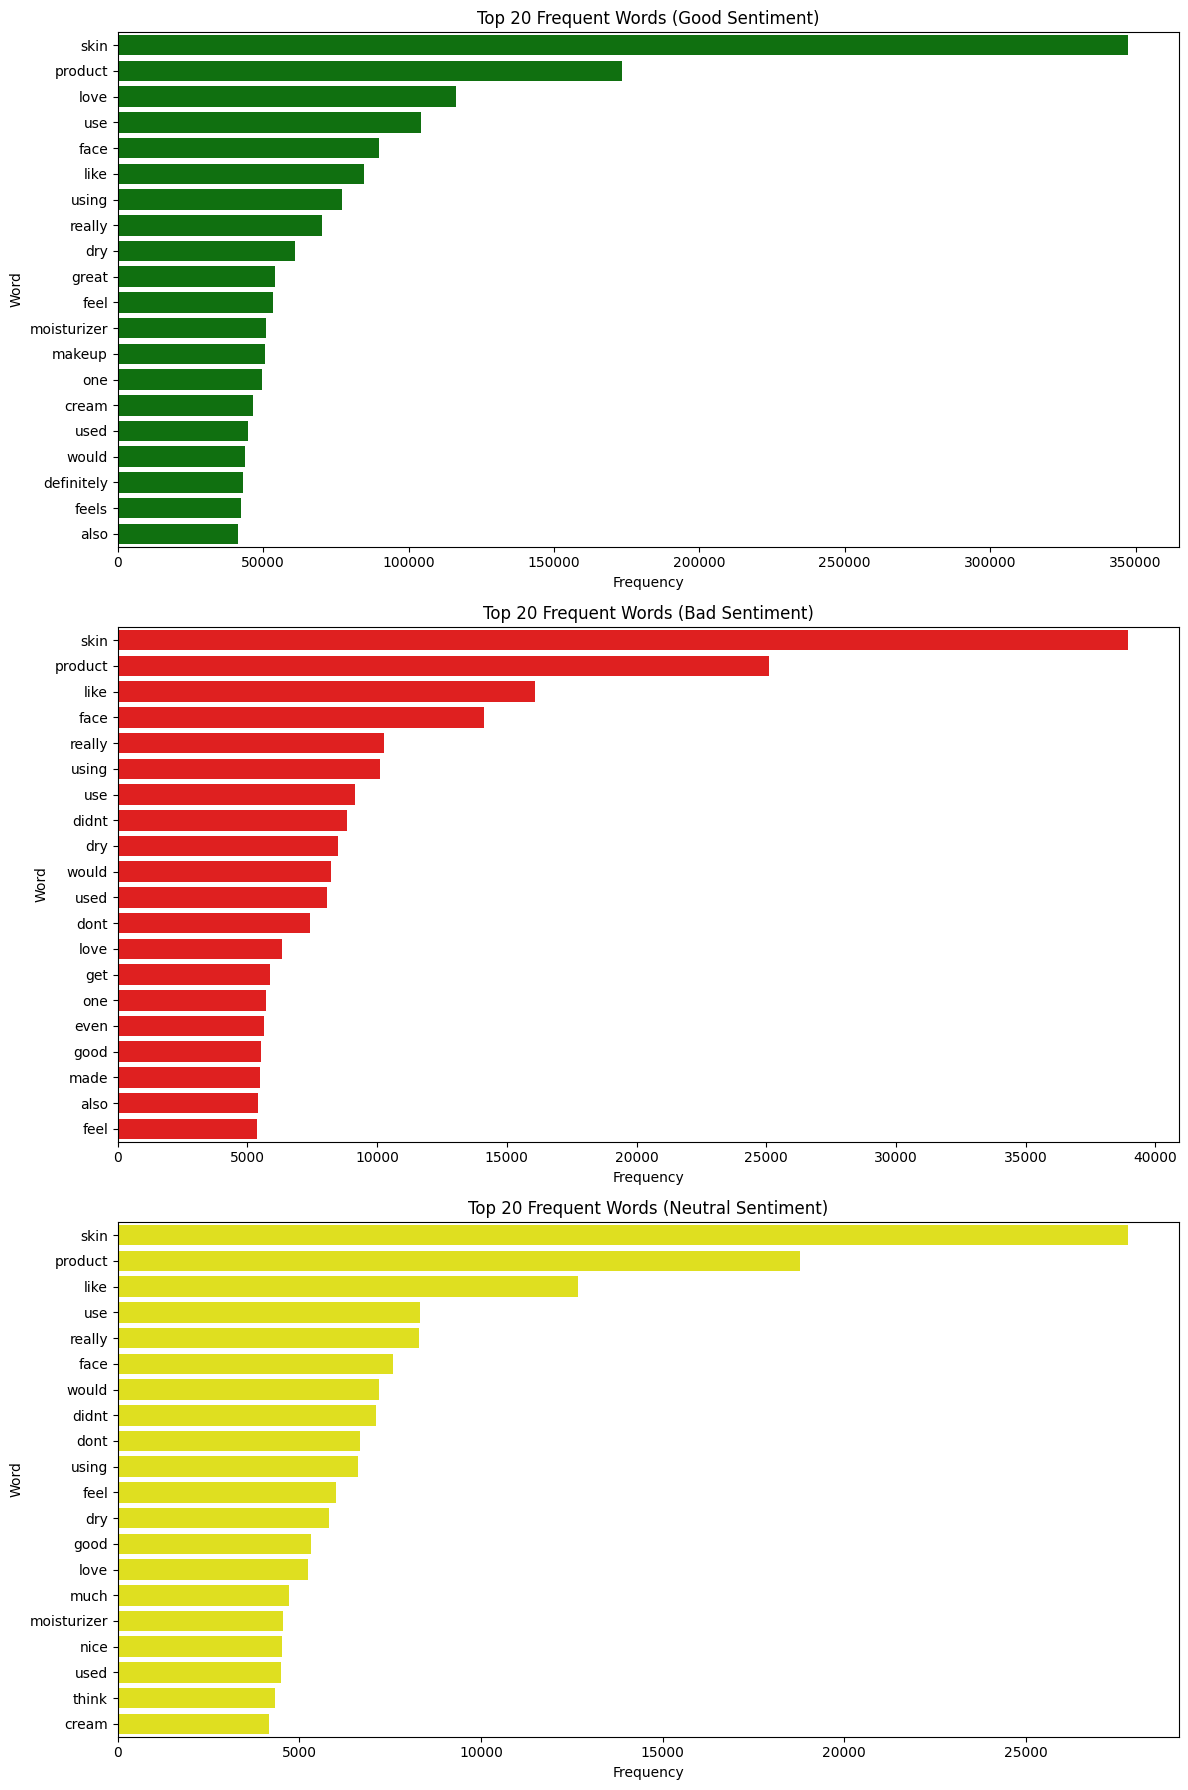

In [20]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Download the NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Sample DataFrame
# df = pd.DataFrame({'cleaned_review_text': ['sample review text'], 'sentiment': ['good']})  # Replace with your DataFrame

# Separate the data based on sentiment
df_good = df[df['sentiment'] == 'good']
df_bad = df[df['sentiment'] == 'bad']
df_neutral = df[df['sentiment'] == 'neutral']

# Function to process text and get the top 20 words
def get_top_20_words(text_series):
    all_text = ' '.join(text_series)
    words = word_tokenize(all_text)
    stop_words = set(stopwords.words('english'))
    custom_stop_words = {'ive', 'im', 'youre', 'thats',  'shes', 'hes', 'theyre', 'its'}
    stop_words.update(custom_stop_words)
    filtered_words = [word for word in words if word.lower() not in stop_words and word.isalpha()]
    word_counts = Counter(filtered_words)
    return word_counts.most_common(20)

# Get top 20 words for each sentiment
top_20_good = get_top_20_words(df_good['cleaned_review_text'])
top_20_bad = get_top_20_words(df_bad['cleaned_review_text'])
top_20_neutral = get_top_20_words(df_neutral['cleaned_review_text'])

# Convert to DataFrame for plotting
top_20_good_df = pd.DataFrame(top_20_good, columns=['Word', 'Frequency'])
top_20_bad_df = pd.DataFrame(top_20_bad, columns=['Word', 'Frequency'])
top_20_neutral_df = pd.DataFrame(top_20_neutral, columns=['Word', 'Frequency'])

# Plot
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# Good sentiment
sns.barplot(x='Frequency', y='Word', data=top_20_good_df, palette=['green']*20, ax=axs[0])
axs[0].set_title('Top 20 Frequent Words (Good Sentiment)')
axs[0].set_xlabel('Frequency')
axs[0].set_ylabel('Word')

# Bad sentiment
sns.barplot(x='Frequency', y='Word', data=top_20_bad_df, palette=['red']*20, ax=axs[1])
axs[1].set_title('Top 20 Frequent Words (Bad Sentiment)')
axs[1].set_xlabel('Frequency')
axs[1].set_ylabel('Word')

# Neutral sentiment
sns.barplot(x='Frequency', y='Word', data=top_20_neutral_df, palette=['yellow']*20, ax=axs[2])
axs[2].set_title('Top 20 Frequent Words (Neutral Sentiment)')
axs[2].set_xlabel('Frequency')
axs[2].set_ylabel('Word')

plt.tight_layout()
plt.show()
